In [215]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#https://ec.europa.eu/eurostat/databrowser/view/lc_lci_lev/default/table?lang=en
df = pd.read_csv('data/estat_lc_lci_lev_en.csv')

In [3]:
df.head()

,DATAFLOW,LAST UPDATE,freq,unit,lcstruct,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:LC_LCI_LEV(1.0),30/03/23 11:00:00,A,EUR,D11,B,AL,2012,2.1,NaN
1,ESTAT:LC_LCI_LEV(1.0),30/03/23 11:00:00,A,EUR,D11,B,AL,2016,2.7,NaN
2,ESTAT:LC_LCI_LEV(1.0),30/03/23 11:00:00,A,EUR,D11,B,AT,2000,20.1,d
3,ESTAT:LC_LCI_LEV(1.0),30/03/23 11:00:00,A,EUR,D11,B,AT,2004,22.3,d
4,ESTAT:LC_LCI_LEV(1.0),30/03/23 11:00:00,A,EUR,D11,B,AT,2008,22.2,NaN


In [5]:
df['unit'].unique()

array(['EUR', 'NAC', 'RT_PRE_EUR', 'RT_PRE_NAC'], dtype=object)

In [6]:
df['lcstruct'].unique()

array(['D11', 'D12_D4_MD5', 'D1_D4_MD5', 'D2-D4_MD5_RAT'], dtype=object)

In [7]:
df['DATAFLOW'].unique()

array(['ESTAT:LC_LCI_LEV(1.0)'], dtype=object)

In [8]:
df['freq'].unique()

array(['A'], dtype=object)

In [9]:
df['nace_r2'].unique()

array(['B', 'B-E', 'B-N', 'B-S_X_O', 'C', 'D', 'E', 'F', 'G', 'G-N', 'H',
       'I', 'J', 'K', 'M', 'N', 'P', 'P-S', 'Q', 'R', 'S'], dtype=object)

In [14]:
df.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], inplace=True)

In [15]:
df.head()

,unit,lcstruct,nace_r2,geo,TIME_PERIOD,OBS_VALUE
0,EUR,D11,B,AL,2012,2.1
1,EUR,D11,B,AL,2016,2.7
2,EUR,D11,B,AT,2000,20.1
3,EUR,D11,B,AT,2004,22.3
4,EUR,D11,B,AT,2008,22.2


In [160]:
df.shape

(50741, 6)

#### Column values documentation
From https://ec.europa.eu/eurostat/databrowser/view/lc_lci_lev/default/table?lang=en

###### nace_r2
construction sector == 'F'

###### lcstruct - labour cost structure
- Labour cost for LCI (compensation of employees plus taxes minus subsidies) - 
[D1_D4_MD5]
- Wages and salaries (total) - 
[D11]
- Labour costs other than wages and salaries - 
[D12_D4_MD5]
- Share of non-wage costs (%) - 
[D2-D4_MD5_RAT]

###### unit

- Euro - 
[EUR]
- National currency - 
[NAC]
- Growth rate on previous period (t/t-1) for values in euro - 
[RT_PRE_EUR]
- Growth rate on previous period (t/t-1) for values in national currency - 
[RT_PRE_NAC]

In [18]:
filtered_df = df[df['nace_r2'] =='F']

In [20]:
filtered_df.shape

(2739, 6)

In [24]:
eur_df = filtered_df[filtered_df['unit'] =='EUR']

In [35]:
print(eur_df['geo'].value_counts().shape)
print(filtered_df['geo'].value_counts().shape)

(43,)
(43,)


In [157]:
print(eur_df[eur_df['geo'] == 'IE'])

      unit       lcstruct nace_r2 geo  TIME_PERIOD  OBS_VALUE iso3
1752   EUR            D11       F  IE         2000       13.8  IRL
1753   EUR            D11       F  IE         2004       22.4  IRL
1754   EUR            D11       F  IE         2008       23.4  IRL
1755   EUR            D11       F  IE         2012       23.3  IRL
1756   EUR            D11       F  IE         2016       22.8  IRL
1757   EUR            D11       F  IE         2020       26.1  IRL
1758   EUR            D11       F  IE         2021       27.6  IRL
1759   EUR            D11       F  IE         2022       28.7  IRL
6668   EUR     D12_D4_MD5       F  IE         2000        2.8  IRL
6669   EUR     D12_D4_MD5       F  IE         2004        3.7  IRL
6670   EUR     D12_D4_MD5       F  IE         2008        4.3  IRL
6671   EUR     D12_D4_MD5       F  IE         2012        3.1  IRL
6672   EUR     D12_D4_MD5       F  IE         2016        2.9  IRL
6673   EUR     D12_D4_MD5       F  IE         2020        1.5 

In [27]:
eur_df.isnull().sum()

unit           0
lcstruct       0
nace_r2        0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [46]:
eur_df['geo'].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA',
       'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU15', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK'], dtype=object)

In [36]:
import plotly.express as px

In [146]:
import requests
import json

# URL to the GeoJSON file containing the European country boundaries
url = 'https://raw.githubusercontent.com/eurostat/Nuts2json/master/pub/v2/2016/4326/nutspt_0.json'

# Download the file and save it to the current directory
response = requests.get(url)
with open('countries-geo.json', 'w') as f:
    f.write(response.text)
    
# Load the GeoJSON file containing the European country boundaries
eu_geojson_file = 'countries-geo.json'
with open(eu_geojson_file, 'r') as f:
    eu_geojson_str = f.read()
    
eu_geojson = json.loads(eu_geojson_str)

In [147]:
# Print the list of country names in the GeoJSON file
country_names = [feat['properties']['id'] for feat in eu_geojson['features']]
print(country_names)

['AL', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK']


In [149]:
fig = px.choropleth(eur_df, 
                    geojson=eu_geojson['features'], # root element in json
                    featureidkey='properties.id', # path to ID values
                    locations='geo', 
                    locationmode='country names', 
                    color='OBS_VALUE', 
                    animation_frame='TIME_PERIOD', 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    range_color=[eur_df['OBS_VALUE'].min(), eur_df['OBS_VALUE'].max()],
                    scope='europe'
                   )
fig.show()

In [133]:
## convert countries in df 
!pip install country_converter --upgrade
import country_converter as coco

In [134]:
# Convert the two-letter country codes to three-letter ISO codes
iso3 = coco.convert(names=eur_df['geo'].tolist(), to='ISO3')

# Add the ISO codes as a new column in the DataFrame
eur_df['iso3'] = iso3
eur_df.head()

EA not found in ISO2
EA not found in ISO2
EA not found in ISO2
EA not found in ISO2
EA not found in ISO2
EA not found in ISO2
EA19 not found in regex
EA19 not found in regex
EA19 not found in regex
EA19 not found in regex
EA19 not found in regex
EA19 not found in regex
EA19 not found in regex
EA20 not found in regex
EA20 not found in regex
EA20 not found in regex
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EL not found in ISO2
EU15 not found in regex
EU15 not found in regex
EU15 not found in regex
EU15 not found in regex
EU15 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU27_2020 not found in regex
EU28 not found in regex
EU28 not found in regex
EU28 not found in regex
EU28 not found in regex
EA not found in ISO2
EA not found in ISO2
EA no

,unit,lcstruct,nace_r2,geo,TIME_PERIOD,OBS_VALUE,iso3
1608,EUR,D11,F,AL,2012,1.6,ALB
1609,EUR,D11,F,AL,2016,2.0,ALB
1610,EUR,D11,F,AT,2000,17.1,AUT
1611,EUR,D11,F,AT,2004,19.3,AUT
1612,EUR,D11,F,AT,2008,19.3,AUT


In [135]:
eur_df['geo'].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA',
       'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU15', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK'], dtype=object)

In [136]:
eur_df['iso3'].unique()

array(['ALB', 'AUT', 'BIH', 'BEL', 'BGR', 'CHE', 'CYP', 'CZE', 'DEU',
       'DNK', 'not found', 'EST', 'ESP', 'FIN', 'FRA', 'HRV', 'HUN',
       'IRL', 'ISL', 'ITA', 'LTU', 'LUX', 'LVA', 'MNE', 'MKD', 'MLT',
       'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SRB', 'SWE', 'SVN', 'SVK',
       'TUR', 'GBR'], dtype=object)

In [194]:
# drop not found values
eur_df = eur_df.loc[eur_df['iso3'] != 'not found']

In [195]:
# preparing different df for plotting
wages_salaries = eur_df[eur_df['lcstruct'] =='D11']
comp_taxes = eur_df[eur_df['lcstruct'] =='D1_D4_MD5']
other_costs = eur_df[eur_df['lcstruct'] =='D12_D4_MD5']

# sorting
wages_salaries = wages_salaries.sort_values(by='TIME_PERIOD')
comp_taxes = comp_taxes.sort_values(by='TIME_PERIOD')
other_costs = other_costs.sort_values(by='TIME_PERIOD')

In [196]:
fig = px.choropleth(sorted_df, 
                    locations="iso3", 
                    #locationmode="country names", 
                    color="OBS_VALUE", 
                    animation_frame="TIME_PERIOD", 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    range_color=[eur_df['OBS_VALUE'].min(), eur_df['OBS_VALUE'].max()],
                    scope='europe',
                    height=600
                   )

fig.update_layout(
    # add a title text for the plot
    title_text = 'Wages and salaries (total) in Europe in the construction sector'
)
fig.show()

In [197]:
fig = px.choropleth(comp_taxes, 
                    locations="iso3", 
                    #locationmode="country names", 
                    color="OBS_VALUE", 
                    animation_frame="TIME_PERIOD", 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    range_color=[eur_df['OBS_VALUE'].min(), eur_df['OBS_VALUE'].max()],
                    scope='europe',
                    height=600
                   )

fig.update_layout(
    # add a title text for the plot
    title_text = 'Labour cost for LCI (compensation of employees plus taxes minus subsidies)'
)
fig.show()

In [198]:
fig = px.choropleth(other_costs, 
                    locations="iso3", 
                    #locationmode="country names", 
                    color="OBS_VALUE", 
                    animation_frame="TIME_PERIOD", 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    range_color=[eur_df['OBS_VALUE'].min(), eur_df['OBS_VALUE'].max()],
                    scope='europe',
                    height=600
                   )

fig.update_layout(
    # add a title text for the plot
    title_text = 'Labour costs other than wages and salaries in construction'
)
fig.show()

In [200]:
fig = px.bar(
  other_costs,
  x='iso3', y='OBS_VALUE',
  color='OBS_VALUE',
  animation_frame='TIME_PERIOD',
  animation_group='iso3',
  hover_name='iso3',
 # range_y=[0,50],
 # range_x=[0,30]
)
fig.update_layout(
    title_text = 'Labour costs other than wages and salaries in construction',
    template='plotly_dark',
    xaxis_title='country'
)
fig.show()

## Ireland focus

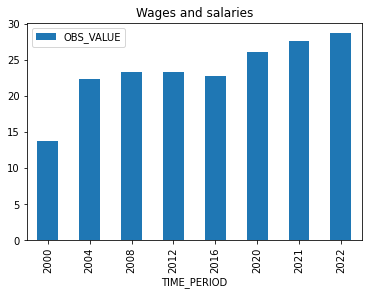

In [221]:
#data_ireland = wages_salaries[wages_salaries['iso3'] =='IRL']
wages_salaries[wages_salaries['iso3'] =='IRL'].plot.bar(x='TIME_PERIOD', y='OBS_VALUE', title='Wages and salaries');

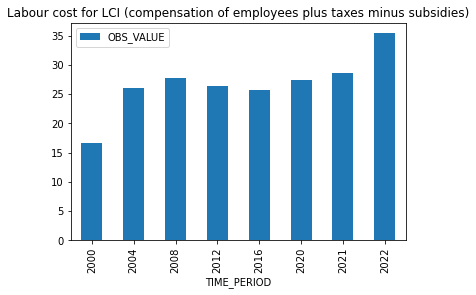

In [220]:
comp_taxes[comp_taxes['iso3'] =='IRL'].plot.bar(x='TIME_PERIOD', y='OBS_VALUE', title='Labour cost for LCI (compensation of employees plus taxes minus subsidies)');

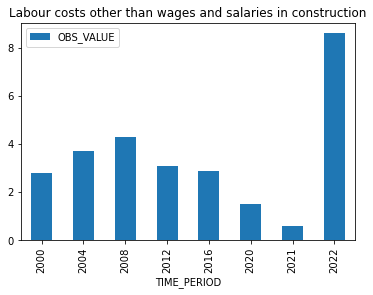

In [219]:
other_costs[other_costs['iso3'] =='IRL'].plot.bar(x='TIME_PERIOD', y='OBS_VALUE', title='Labour costs other than wages and salaries in construction');

### comparison of wages and salaries